# Household Items Regression Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
data = pd.read_csv('../data/data.csv', encoding = 'ISO-8859-1')

In [3]:
# Remove noise data from quantity & UnitPrice 
# Only keep rows with quantity > 0 and price > 0 
data = data[(data['Quantity']> 0) & (data['UnitPrice'] > 0)]

In [4]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
# Chosen household items have been explained in another notebook

chosen = ['23166', '85099B', '85123A', '23084', '22197']

def summary(pid):
    df = data[data['StockCode'] == pid]
    df = df.reindex(df.index.repeat(df.Quantity))
    grouping = df.groupby(['UnitPrice']).size()
    grouping_df = grouping.to_frame().reset_index()
    grouping_df.columns = ['UnitPrice','Quantity']
    return pd.DataFrame(grouping_df)

for pid in chosen:
    print(data[data['StockCode'] == pid].Description.iloc[0])
    print(summary(pid))
    print()

MEDIUM CERAMIC TOP STORAGE JAR
   UnitPrice  Quantity
0       1.04     76087
1       1.25      1832
2       2.46       114

JUMBO BAG RED RETROSPOT
    UnitPrice  Quantity
0        1.65      9230
1        1.74      1600
2        1.75       800
3        1.79     19136
4        1.95      4003
5        2.04       100
6        2.08     11430
7        2.46       165
8        4.13      1691
9        4.21       108
10       4.95       211

WHITE HANGING HEART T-LIGHT HOLDER
   UnitPrice  Quantity
0       2.40      1930
1       2.55     20030
2       2.95     11107
3       3.20      1888
4       3.24      2226
5       5.79       334
6       5.91       145

RABBIT NIGHT LIGHT
   UnitPrice  Quantity
0       1.67        12
1       1.79     20009
2       2.08      7105
3       4.13      2172
4       4.95      1032
5       4.96       458

SMALL POPCORN HOLDER
   UnitPrice  Quantity
0       0.72     36136
1       0.85     13475
2       1.63      2176
3       1.66       581
4       1.95      3587
5  

In [6]:
from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
newDict = {
        'Item': [],
        'R Squared Value':[]
    }

In [8]:
data['InvoiceDate']= pd.to_datetime(data['InvoiceDate']) #converting column invoicedate to datetime format
data = data.set_index('InvoiceDate') #setting date as an index for the dataframe

In [9]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday Name'] = data.index.day_name()
data['Hour'] = data.index.hour

In [10]:
#Remove Outlier
from scipy import stats
data = data[(np.abs(stats.zscore(data['Quantity'])) < 3)]

In [11]:
def display_regression_plot(data):
    sns.pairplot(data, kind = 'reg', size = 10, x_vars = ['UnitPrice'], y_vars = ['Quantity'])
    plt.show()

In [12]:
def partial_regression_plot(model):
    fig = plt.figure(figsize=(12,8))
    sm.graphics.plot_partregress_grid(model, fig = fig)

In [13]:
def ccpr_plot(model):
    fig = plt.figure(figsize=(12,8))
    sm.graphics.plot_ccpr_grid(model, fig = fig)

In [14]:
def reg_plot(data):
    model = ols("np.log(Quantity) ~ np.log(UnitPrice)", data = data).fit()
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_regress_exog(model, 'np.log(UnitPrice)', fig=fig)

In [15]:
def ols_summary_log(data, newDict, description):
    model = ols("np.log(Quantity) ~ np.log(UnitPrice)", data = data).fit()
    print(model.summary())
    newDict['Item'].append(description)
    newDict['R Squared Value'].append(model.rsquared)
    partial_regression_plot(model)
    ccpr_plot(model)

In [16]:
def rls_summary_log(data):
    endog = np.log(data['Quantity'])
    exog = sm.add_constant(np.log(data['UnitPrice']))
    mod = sm.RecursiveLS(endog, exog)
    res = mod.fit()
    print(res.summary())
    res.plot_recursive_coefficient(range(mod.k_exog), alpha=None, figsize=(10,6));

In [17]:
def PED(data):
    
    newDict = {
        'Item': [],
        'Price Elasticity of Demand':[]
    }
    
    chosen = ['23166', '85099B', '85123A', '23084', '22197']
    
    for stockID in chosen:
        data_modified = data[data['StockCode'] == stockID]

        model = ols("np.log(Quantity) ~ np.log(UnitPrice)", data = data_modified).fit()
        intercept, slope = model.params
        mean_price = np.mean(data_modified['UnitPrice'])
        mean_quantity = np.mean(data_modified['Quantity'])

        price_elasticity = ((slope) * (mean_price/mean_quantity))

        newDict['Item'].append(data_modified.iloc[0]['Description'])
        newDict['Price Elasticity of Demand'].append(price_elasticity)
        
    return pd.DataFrame(newDict)

## Price Elasticity of Demand

In [18]:
ped_df = PED(data)
ped_df

,Item,Price Elasticity of Demand
0,MEDIUM CERAMIC TOP STORAGE JAR,-0.252276
1,JUMBO BAG RED RETROSPOT,-0.270049
2,WHITE HANGING HEART T-LIGHT HOLDER,-0.643593
3,RABBIT NIGHT LIGHT,-0.152063
4,SMALL POPCORN HOLDER,-0.064470


# Check the residual plots for assumptions of Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
def check_assumptions(i):
    
    testing = data.loc[data['StockCode'] == i]
    tester = testing.groupby(['UnitPrice']).size()
    test_df = tester.to_frame().reset_index()
    test_df.columns = ['UnitPrice','Quantity']

    X = test_df['UnitPrice'].values
    X=X.reshape(-1,1)
    y = test_df['Quantity']
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    y_pred = lm.predict(X_test)
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    results['residuals'] = results['Actual'] - results['Predicted']
    #print(results['residuals'].hist())
    fig = plt.figure(figsize=(5, 5))
    print("*"*10 + i + "*"*10)
    print(plt.scatter(results['Predicted'], results['residuals'],  color='blue'))

**********23166**********
**********85099B**********
**********85123A**********
**********23084**********
**********22197**********


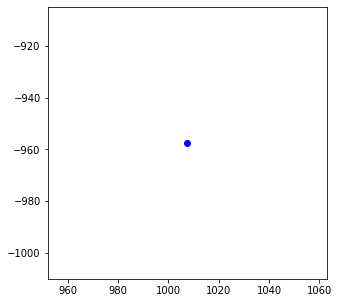

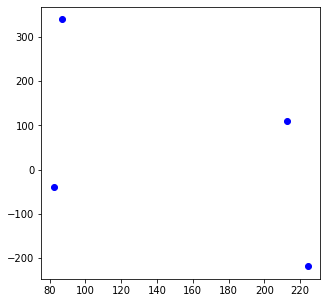

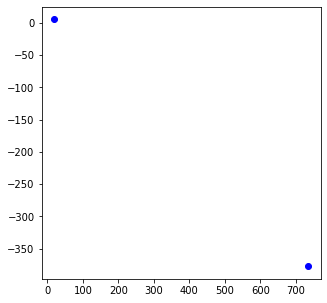

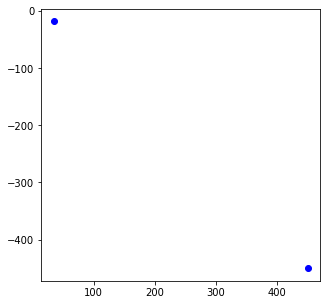

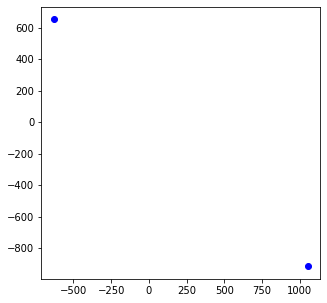

In [20]:
for i in chosen:
    check_assumptions(i)

### Choice of Regression Models

In our analyses, we employed both Ordinary Least Squares Regression & Recursive Least Squares Regression. 

#### Ordinary Least Squares Regression

Ordinary Least Squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable. It estimates the aforementioned relationship by minimizing the sum of  squares in the difference between the observed and predicted values of the dependent variable configured as a straight line.

#### Recursive Least Squares Regression
Recursive least squares (RLS) is an expanding window version of ordinary least squares. In addition to recursively calculating the regression coefficients, it aims to minimize a weighted linear least squares cost function rather than the usual mean square error.

#### Motivation

The motivation behind using 2 models is to check for any possible discrepancy in our regression analysis results and ascertain if our results are consistent & validated.

# MEDIUM CERAMIC TOP STORAGE JAR

C:\Users\ernes\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


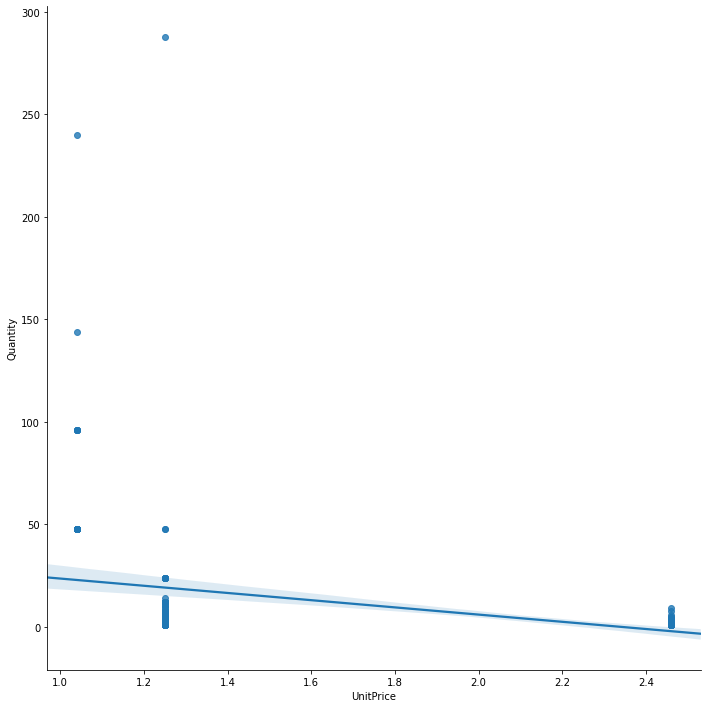

In [21]:
display_regression_plot(data[data['StockCode'] == chosen[0]])

In [22]:
data[data['StockCode'] == chosen[0]].skew()
# From this data, we have to transform columns quantity & unit price as it is highly skewed
# For the purpose of this analysis, we will use log to transform the skewed variables

InvoiceNo     0.263600
StockCode     0.000000
Quantity      5.574013
UnitPrice     1.435880
CustomerID    0.064892
Year          0.000000
Month        -0.005586
Hour         -0.208934
dtype: float64

## Ordinary Least Squares (OLS) Estimation

                            OLS Regression Results                            
Dep. Variable:       np.log(Quantity)   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     136.0
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           2.51e-25
Time:                        17:26:35   Log-Likelihood:                -357.49
No. Observations:                 249   AIC:                             719.0
Df Residuals:                     247   BIC:                             726.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.7619      0.10

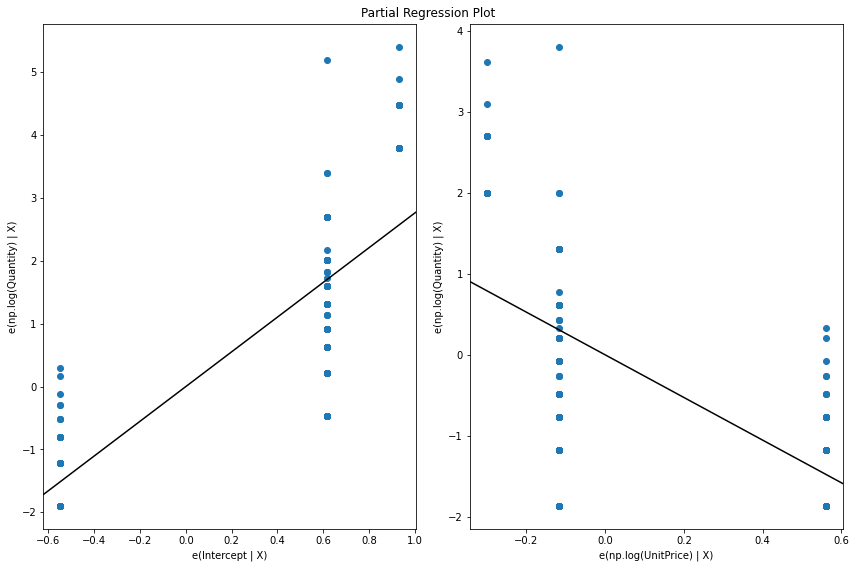

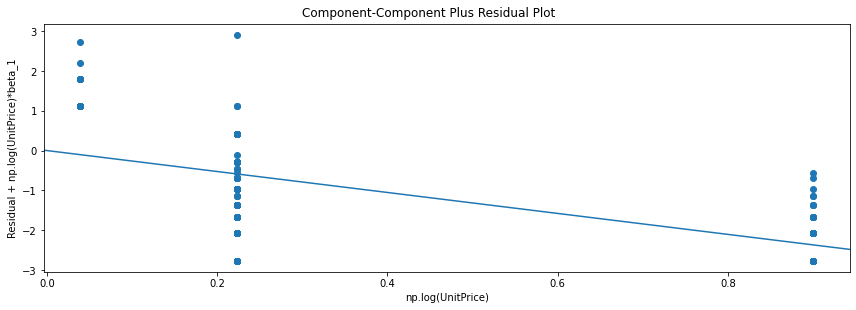

In [23]:
ols_summary_log(data[data['StockCode'] == chosen[0]], newDict, 'MEDIUM CERAMIC TOP STORAGE JAR')

##### Summary Table
The small p values indicate that we can reject the null hypothesis that price has no effect on quantity. Therefore, price does have an effect on quantity for this particular item.

The coefficient of price is -2.6311. This refers to the inverse relationship between price and quantity. When price increases, quantity demanded decreases & vice versa.

However, our current model can only explain a proportion of the variance. This can be seen from its R score of 0.355

##### Partial Regression Plot
As seen in the regression plot on the right, price & quantity have exhibits a negative relationship. When the price increases, the quantity of products sold will decrease.

##### Component-Component Plus Residual Plot
To properly evaluate the effects of price on quantity, we have to take into account the influence of other independent variables. As shown, the relationship between the variation in quantity explained by price is linear. There are not evident factors that are exerting considerable influence on the linear relationship.

## Regression plots

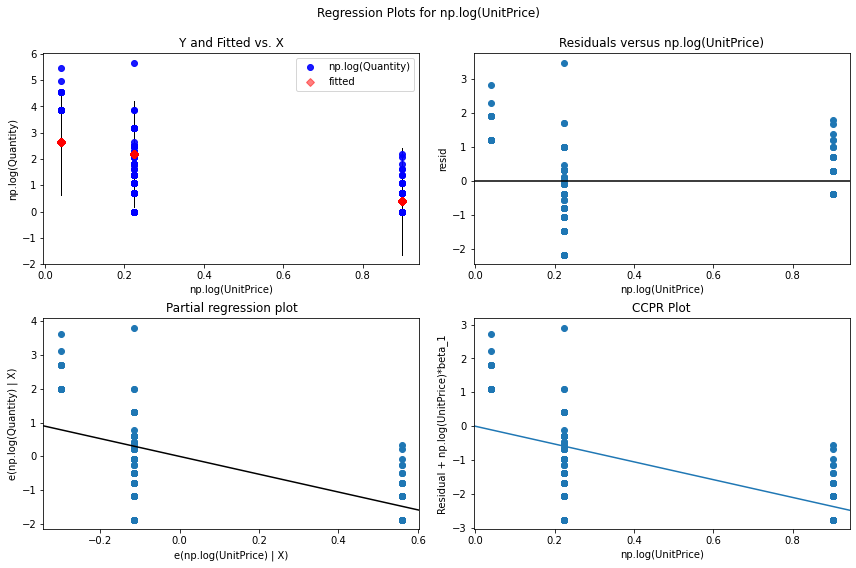

In [24]:
reg_plot(data[data['StockCode'] == chosen[0]])

##### Regression Plots
In graph Y and fitted vs X & Residuals vs Price, we can see that the variation between the predicted & the actual values are moderately high. The model is currently able to only able to explain a proportion of the variance.

## Recursive Least Square (RLS)

C:\Users\ernes\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\ernes\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:               Quantity   No. Observations:                  249
Model:                    RecursiveLS   Log Likelihood                -361.721
Date:                Thu, 22 Apr 2021   R-squared:                       0.355
Time:                        17:26:38   AIC                            727.442
Sample:                             0   BIC                            734.477
                                - 249   HQIC                           730.274
Covariance Type:            nonrobust   Scale                            1.042
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7619      0.100     27.562      0.000       2.566       2.958
UnitPrice     -2.6311      0.226    -11.662      0.000      -3.073      -2.189
Ljung-Box (Q):                       42.53   Jarque-

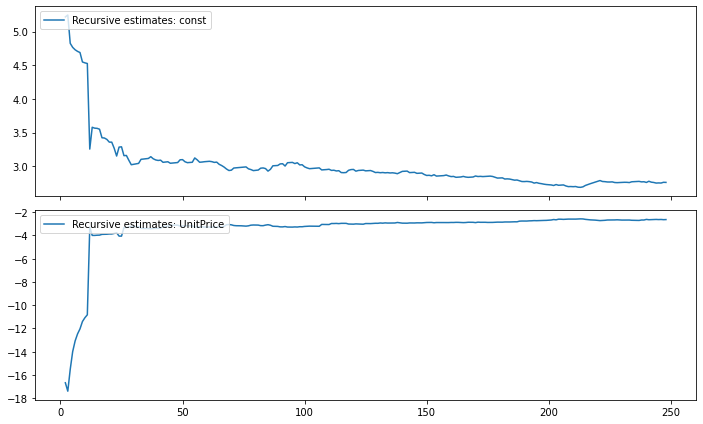

In [25]:
rls_summary_log(data[data['StockCode'] == chosen[0]])

##### Summary Table
The R-squared value, coefficient of price together and the p value remained consistent with the Ordinary Least Squares (OLS) calculation.

In [26]:
ped_df[ped_df['Item'] == 'MEDIUM CERAMIC TOP STORAGE JAR']

,Item,Price Elasticity of Demand
0,MEDIUM CERAMIC TOP STORAGE JAR,-0.252276


### Conclusion for the Medium Ceramic Top Storage Jar
Both Ordinary Least Squares (OLS) & Recursive Least Squares (RLS) are consistent with the fact that price exhibits a OPPOSITE influence on quantity.

Since the price elasticity of demand is < 1, we can conclude that the item is inelastic where changes in price have a less than proportional effect on the quantity of the good demanded. 

# JUMBO BAG RED RETROSPOT

C:\Users\ernes\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


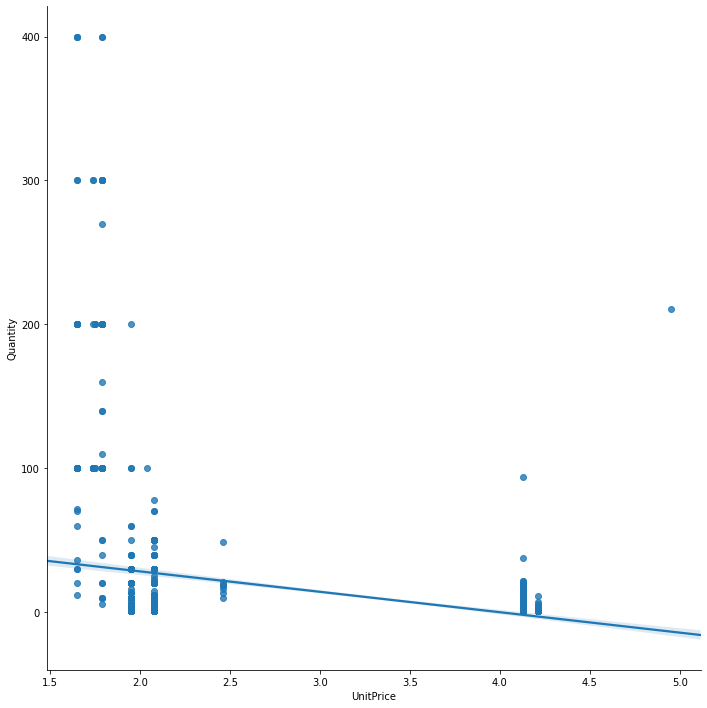

In [27]:
display_regression_plot(data[data['StockCode'] == chosen[1]])

In [28]:
data[data['StockCode'] == chosen[1]].skew()
# From this data, we have to transform columns quantity & unit price as it is highly skewed
# For the purpose of this analysis, we will use log to transform the skewed variables

InvoiceNo     0.008037
Quantity      4.322838
UnitPrice     1.281189
CustomerID    0.049171
Year         -3.828339
Month        -0.211029
Hour          0.072493
dtype: float64

## Ordinary Least Squares (OLS) Estimation

                            OLS Regression Results                            
Dep. Variable:       np.log(Quantity)   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     845.6
Date:                Thu, 22 Apr 2021   Prob (F-statistic):          1.36e-156
Time:                        17:26:40   Log-Likelihood:                -3242.7
No. Observations:                2109   AIC:                             6489.
Df Residuals:                    2107   BIC:                             6501.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.0609      0.07

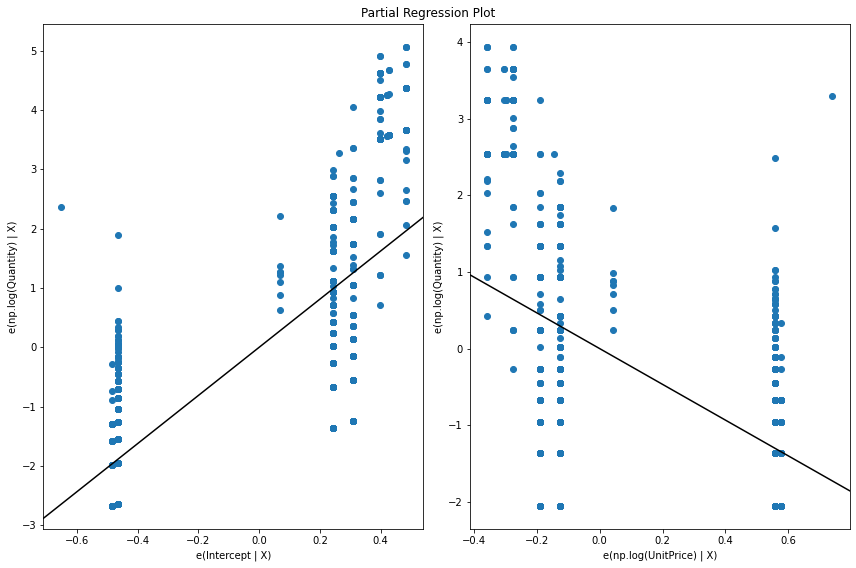

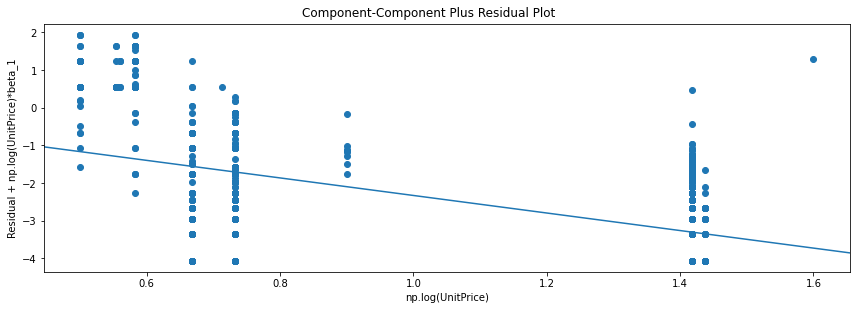

In [29]:
ols_summary_log(data[data['StockCode'] == chosen[1]], newDict, 'JUMBO BAG RED RETROSPOT')

##### Summary Table
The small p values indicate that we can reject the null hypothesis that price has no effect on quantity. Therefore, price does have an effect on quantity for this particular item.

The coefficient of price is -2.3314. This refers to the inverse relationship between price and quantity. When price increases, quantity demanded decreases & vice versa

However, our current model can only explain a proportion of the variance. This can be seen from its R score of 0.286

##### Partial Regression Plot
As seen in the regression plot on the right, price & quantity have exhibits a negative relationship. When the price increases, the quantity of products sold will decrease.

##### Component-Component Plus Residual Plot
To properly evaluate the effects of price on quantity, we have to take into account the influence of other independent variables. As shown, the relationship between the variation in quantity explained by price is linear. There are not many factors that are exerting considerable influence on the linear relationship.

## Regression plots

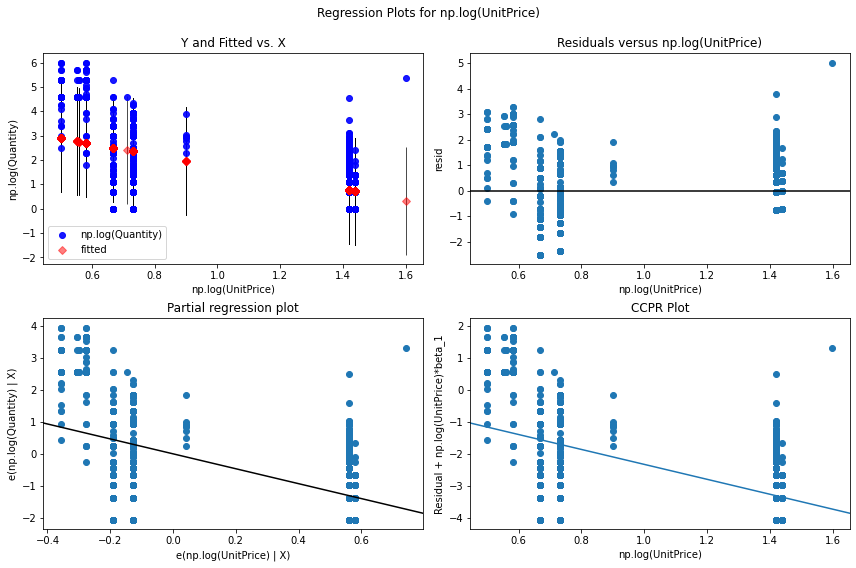

In [30]:
reg_plot(data[data['StockCode'] == chosen[1]])

##### Regression Plots
In graph Y and fitted vs X & Residuals vs Price, we can see that the variation between the predicted & the actual values are moderately high. The model is currently only able to explain a proportion of the variance.

## Recursive Least Square (RLS)

C:\Users\ernes\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\ernes\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:               Quantity   No. Observations:                 2109
Model:                    RecursiveLS   Log Likelihood               -3248.932
Date:                Thu, 22 Apr 2021   R-squared:                       0.286
Time:                        17:26:44   AIC                           6501.865
Sample:                             0   BIC                           6513.173
                               - 2109   HQIC                          6506.006
Covariance Type:            nonrobust   Scale                            1.270
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0609      0.073     55.553      0.000       3.918       4.204
UnitPrice     -2.3314      0.080    -29.072      0.000      -2.489      -2.174
Ljung-Box (Q):                       49.76   Jarque-

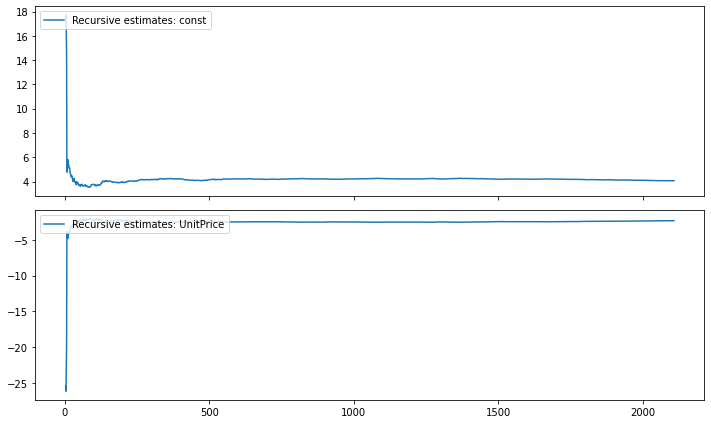

In [31]:
rls_summary_log(data[data['StockCode'] == chosen[1]])

##### Summary Table
The R-squared value, coefficient of price together and the p value remained consistent with the Ordinary Least Squares (OLS) calculation.

In [32]:
ped_df[ped_df['Item'] == 'JUMBO BAG RED RETROSPOT']

,Item,Price Elasticity of Demand
1,JUMBO BAG RED RETROSPOT,-0.270049


### Conclusion for the Jumbo Bag Red Retrospot
Both Ordinary Least Squares (OLS) & Recursive Least Squares (RLS) are consistent with the fact that price exhibits a OPPOSITE influence on quantity.

Since the price elasticity of demand is < 1, we can conclude that the item is inelastic where changes in price have a less than proportional effect on the quantity of the good demanded. 

# WHITE HANGING HEART T-LIGHT HOLDER

C:\Users\ernes\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


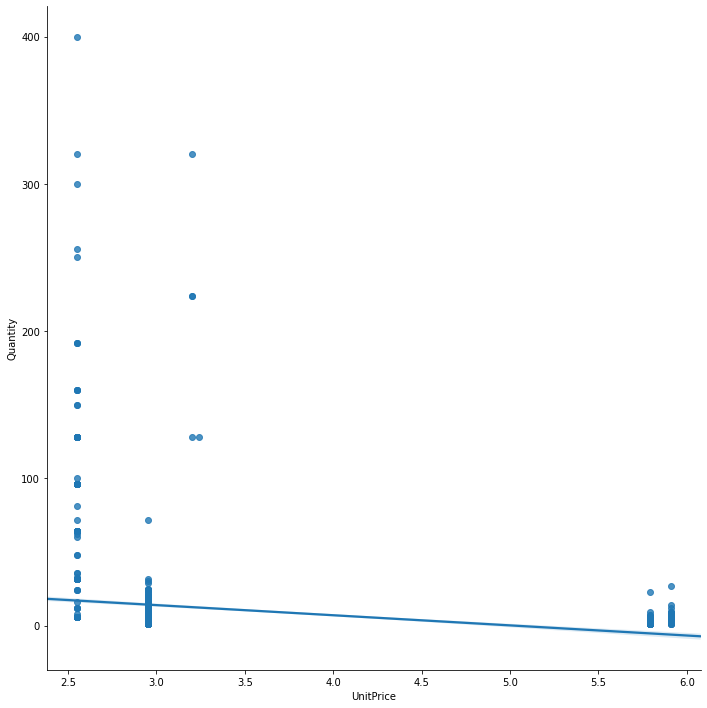

In [33]:
display_regression_plot(data[data['StockCode'] == chosen[2]])

In [34]:
data[data['StockCode'] == chosen[2]].skew()
# From this data, we have to transform columns quantity & unit price as it is highly skewed
# For the purpose of this analysis, we will use log to transform the skewed variables

InvoiceNo     0.238126
Quantity      6.811820
UnitPrice     2.897210
CustomerID   -0.006740
Year         -2.649684
Month        -0.085736
Hour          0.163168
dtype: float64

## Ordinary Least Squares (OLS) Estimation

                            OLS Regression Results                            
Dep. Variable:       np.log(Quantity)   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     658.3
Date:                Thu, 22 Apr 2021   Prob (F-statistic):          1.31e-127
Time:                        17:26:46   Log-Likelihood:                -3195.6
No. Observations:                2257   AIC:                             6395.
Df Residuals:                    2255   BIC:                             6407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.8683      0.12

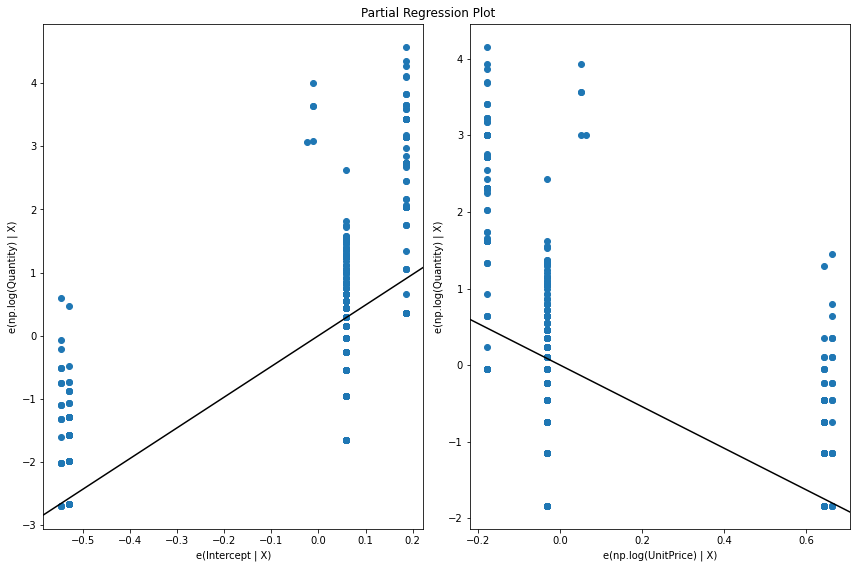

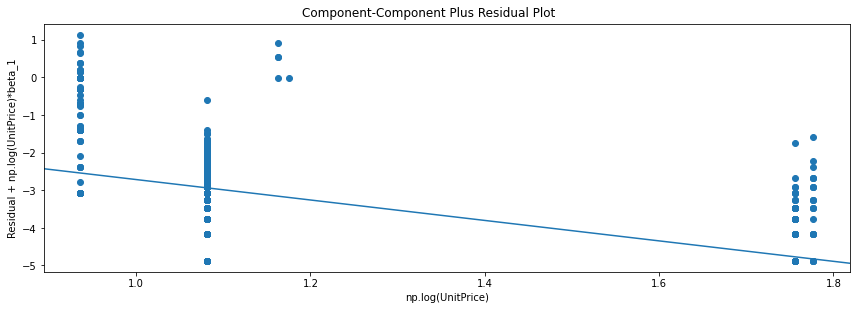

In [35]:
ols_summary_log(data[data['StockCode'] == chosen[2]], newDict, 'WHITE HANGING HEART T-LIGHT HOLDER')

##### Summary Table
The small p values indicate that we can reject the null hypothesis that price has no effect on quantity. Therefore, price does have an effect on quantity for this particular item.

The coefficient of price is -2.7162. This refers to the inverse relationship between price and quantity. When price increases, quantity demanded decreases & vice versa

However, our current model can only explain a proportion of the variance. This can be seen from its R score of 0.226

##### Partial Regression Plot
As seen in the regression plot on the right, price & quantity have exhibits a negative relationship. When the price increases, the quantity of products sold will decrease.

##### Component-Component Plus Residual Plot
To properly evaluate the effects of price on quantity, we have to take into account the influence of other independent variables. As shown, the relationship between the variation in quantity explained by price is linear. There are not many factors that are exerting considerable influence on the linear relationship.

## Regression plots

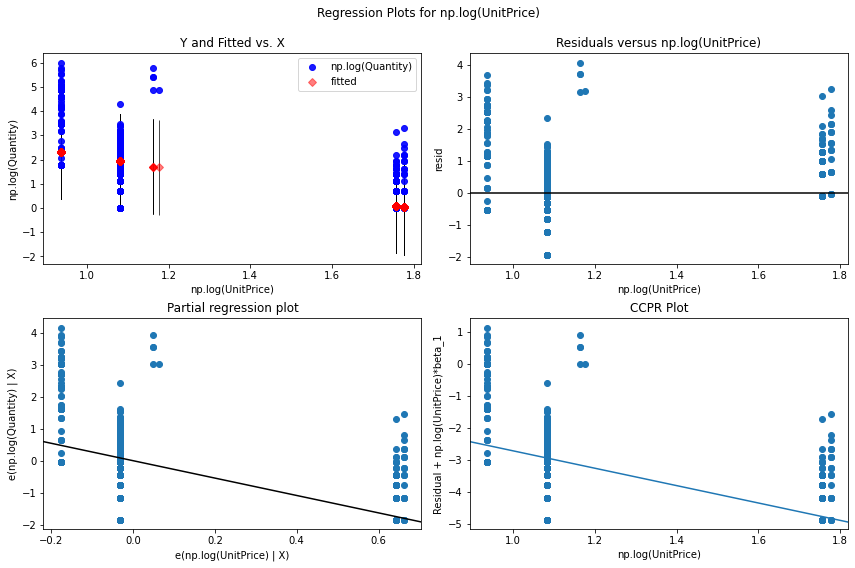

In [36]:
reg_plot(data[data['StockCode'] == chosen[2]])

##### Regression Plots
In graph Y and fitted vs X & Residuals vs Price, we can see that the variation between the predicted & the actual values are moderately high. The model is currently only able to explain a proportion of the variance.

## Recursive Least Square (RLS)

C:\Users\ernes\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\ernes\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:               Quantity   No. Observations:                 2257
Model:                    RecursiveLS   Log Likelihood               -3201.749
Date:                Thu, 22 Apr 2021   R-squared:                       0.228
Time:                        17:26:49   AIC                           6407.498
Sample:                             0   BIC                           6418.942
                               - 2257   HQIC                          6411.674
Covariance Type:            nonrobust   Scale                            0.994
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8683      0.120     40.663      0.000       4.634       5.103
UnitPrice     -2.7162      0.106    -25.662      0.000      -2.924      -2.509
Ljung-Box (Q):                       64.36   Jarque-

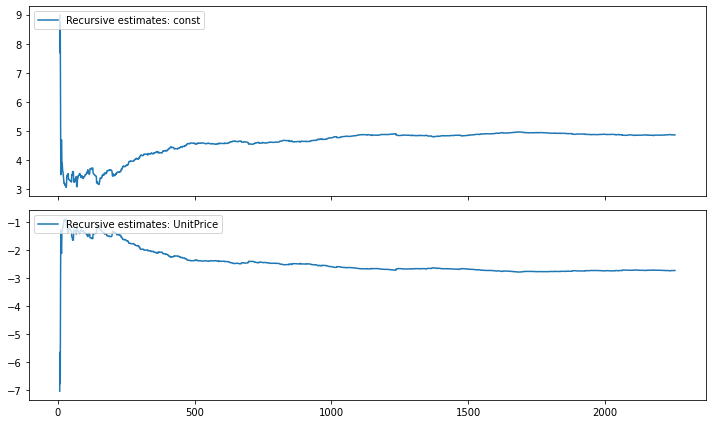

In [37]:
rls_summary_log(data[data['StockCode'] == chosen[2]])

##### Summary Table
While the coefficient of price together with the p value remained consistent with the Ordinary Least Squares (OLS) calculation, the R score of the RLS model is slightly higher (0.228).

In [38]:
ped_df[ped_df['Item'] == 'WHITE HANGING HEART T-LIGHT HOLDER']

,Item,Price Elasticity of Demand
2,WHITE HANGING HEART T-LIGHT HOLDER,-0.643593


### Conclusion for the White Hanging Heart T-Light Holder

Both Ordinary Least Squares (OLS) & Recursive Least Squares (RLS) are consistent with the fact that price exhibits a OPPOSITE influence on quantity.

Since the price elasticity of demand is < 1, we can conclude that the item is inelastic where changes in price have a less than proportional effect on the quantity of the good demanded. 

# RABBIT NIGHT LIGHT

C:\Users\ernes\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


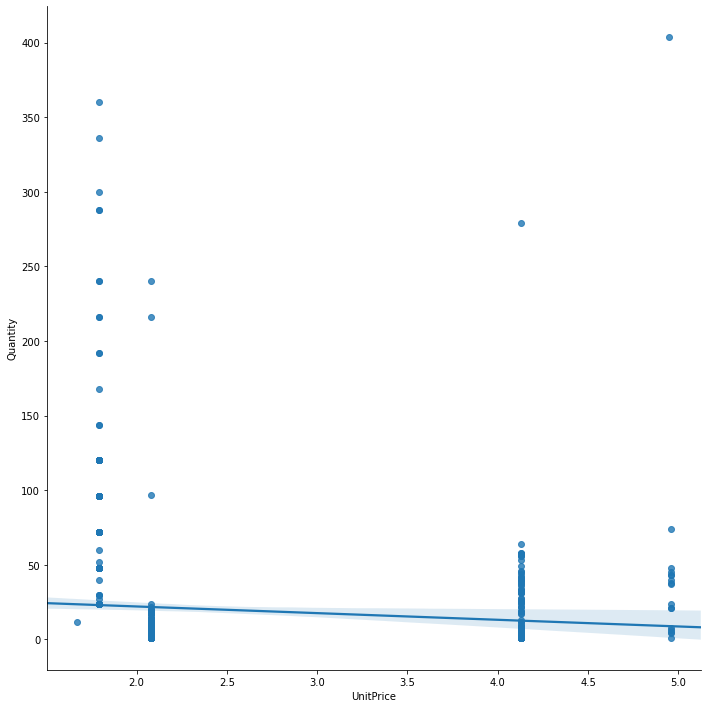

In [39]:
display_regression_plot(data[data['StockCode'] == chosen[3]])

In [40]:
data[data['StockCode'] == chosen[3]].skew()
# From this data, we have to transform columns quantity & unit price as it is highly skewed
# For the purpose of this analysis, we will use log to transform the skewed variables

InvoiceNo    -0.901000
StockCode     0.000000
Quantity      5.072211
UnitPrice     1.697333
CustomerID    0.213979
Year          0.000000
Month        -1.030674
Hour         -0.014906
dtype: float64

## Ordinary Least Squares (OLS) Estimation

                            OLS Regression Results                            
Dep. Variable:       np.log(Quantity)   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     86.53
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           8.05e-20
Time:                        17:26:51   Log-Likelihood:                -1735.5
No. Observations:                1028   AIC:                             3475.
Df Residuals:                    1026   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.1500      0.12

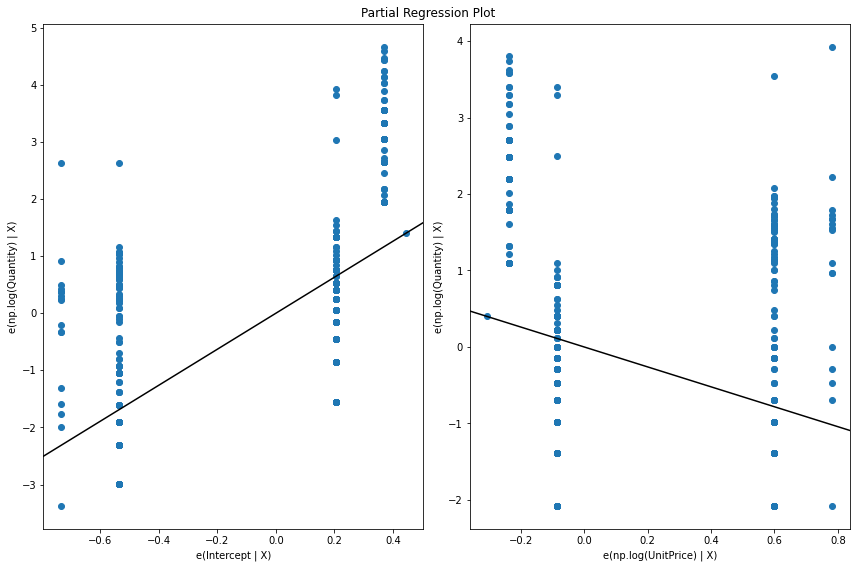

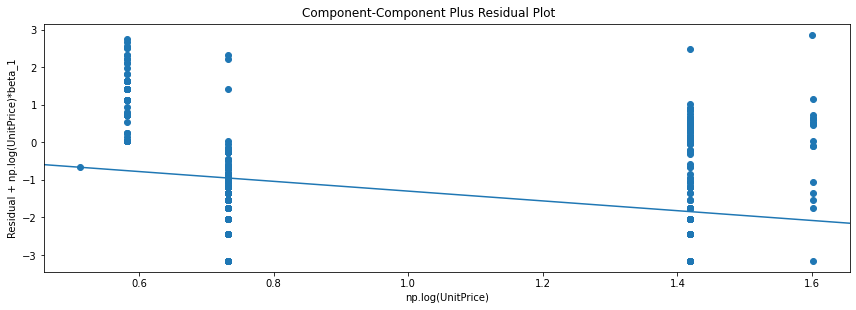

In [41]:
ols_summary_log(data[data['StockCode'] == chosen[3]], newDict, 'RABBIT NIGHT LIGHT')

##### Summary Table
The small p values indicate that we can reject the null hypothesis that price has no effect on quantity. Therefore, price does have an effect on quantity for this particular item.

The coefficient of price is -1.3024. This refers to the inverse relationship between price and quantity. When price increases, quantity demanded decreases & vice versa


However, our current model can only explain a proportion of the variance. This can be seen from its R score of 0.078

##### Partial Regression Plot
As seen in the regression plot on the right, price & quantity have exhibits a negative relationship. When the price increases, the quantity of products sold will decrease.

##### Component-Component Plus Residual Plot
To properly evaluate the effects of price on quantity, we have to take into account the influence of other independent variables. As shown, the relationship between the variation in quantity explained by price is linear. There are not many factors that are exerting considerable influence on the linear relationship.

## Regression plots

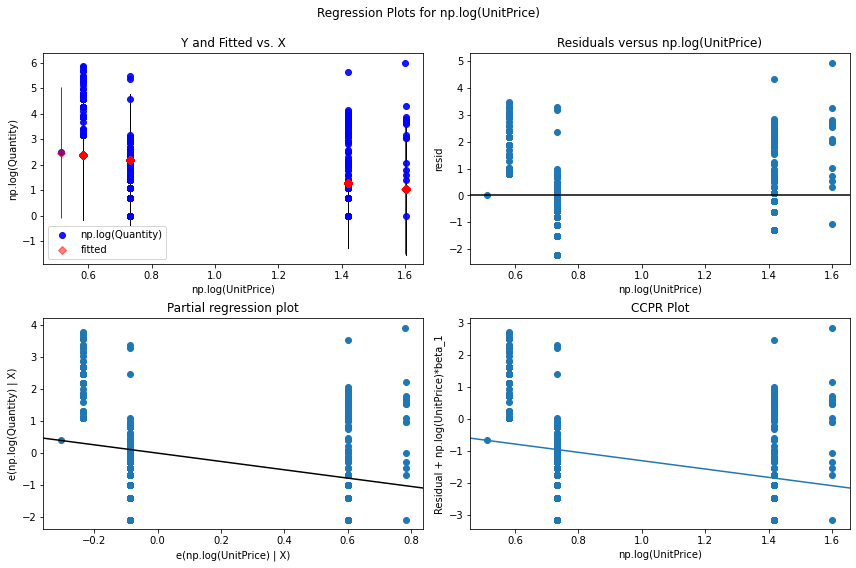

In [42]:
reg_plot(data[data['StockCode'] == chosen[3]])

##### Regression Plots
In graph Y and fitted vs X & Residuals vs Price, we can see that the variation between the predicted & the actual values are moderately high. The model is currently only able to explain a proportion of the variance.

## Recursive Least Square (RLS)

C:\Users\ernes\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\ernes\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:               Quantity   No. Observations:                 1028
Model:                    RecursiveLS   Log Likelihood               -1740.622
Date:                Thu, 22 Apr 2021   R-squared:                       0.078
Time:                        17:26:54   AIC                           3485.245
Sample:                             0   BIC                           3495.115
                               - 1028   HQIC                          3488.991
Covariance Type:            nonrobust   Scale                            1.718
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1500      0.122     25.879      0.000       2.911       3.389
UnitPrice     -1.3024      0.140     -9.299      0.000      -1.577      -1.028
Ljung-Box (Q):                       61.44   Jarque-

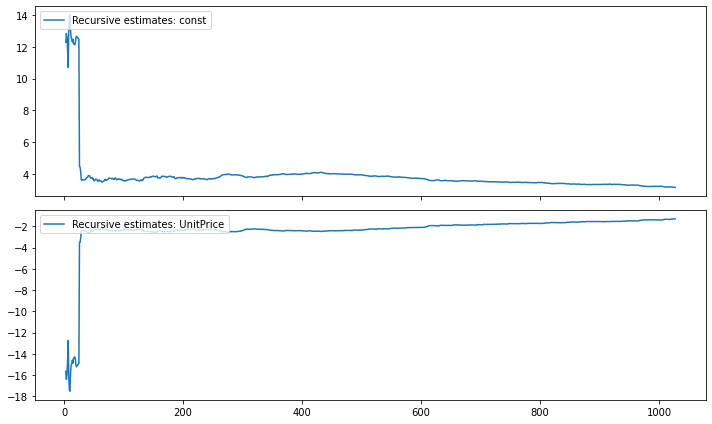

In [43]:
rls_summary_log(data[data['StockCode'] == chosen[3]])

##### Summary Table
The R-squared value, coefficient of price together and the p value remained consistent with the Ordinary Least Squares (OLS) calculation.

In [44]:
ped_df[ped_df['Item'] == 'RABBIT NIGHT LIGHT']

,Item,Price Elasticity of Demand
3,RABBIT NIGHT LIGHT,-0.152063


### Conclusion for the Rabbit Night Light
Both Ordinary Least Squares (OLS) & Recursive Least Squares (RLS) are consistent with the fact that price exhibits a OPPOSITE influence on quantity.

Since the price elasticity of demand is < 1, we can conclude that the item is inelastic where changes in price have a less than proportional effect on the quantity of the good demanded. 

# SMALL POPCORN HOLDER

C:\Users\ernes\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


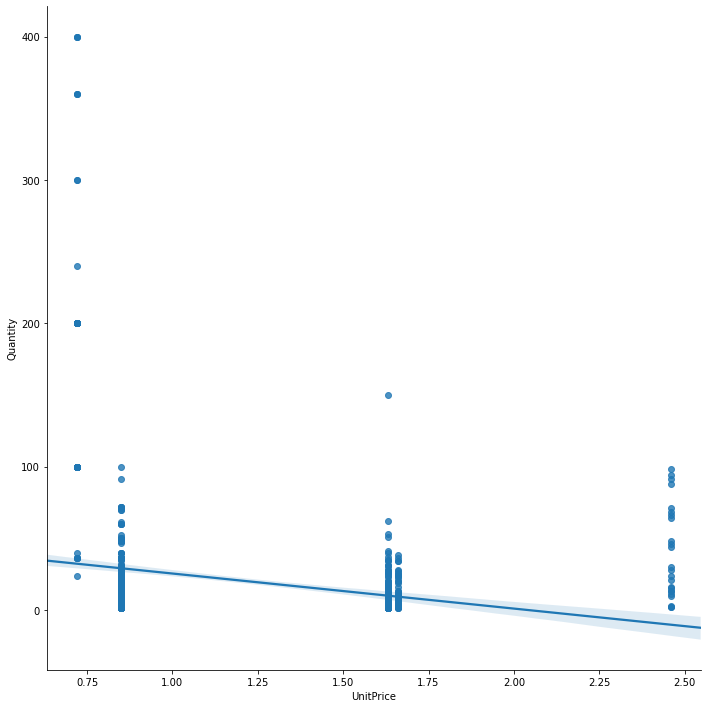

In [45]:
display_regression_plot(data[data['StockCode'] == chosen[4]])

In [46]:
data[data['StockCode'] == chosen[4]].skew()
# From this data, we have to transform columns quantity & unit price as it is highly skewed
# For the purpose of this analysis, we will use log to transform the skewed variables

InvoiceNo    -0.116108
StockCode     0.000000
Quantity      4.449833
UnitPrice     1.519944
CustomerID   -0.019681
Year         -2.907485
Month        -0.447597
Hour          0.144175
dtype: float64

## Ordinary Least Squares (OLS) Estimation

                            OLS Regression Results                            
Dep. Variable:       np.log(Quantity)   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     219.9
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           2.47e-46
Time:                        17:26:56   Log-Likelihood:                -2226.8
No. Observations:                1406   AIC:                             4458.
Df Residuals:                    1404   BIC:                             4468.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.3492      0.03

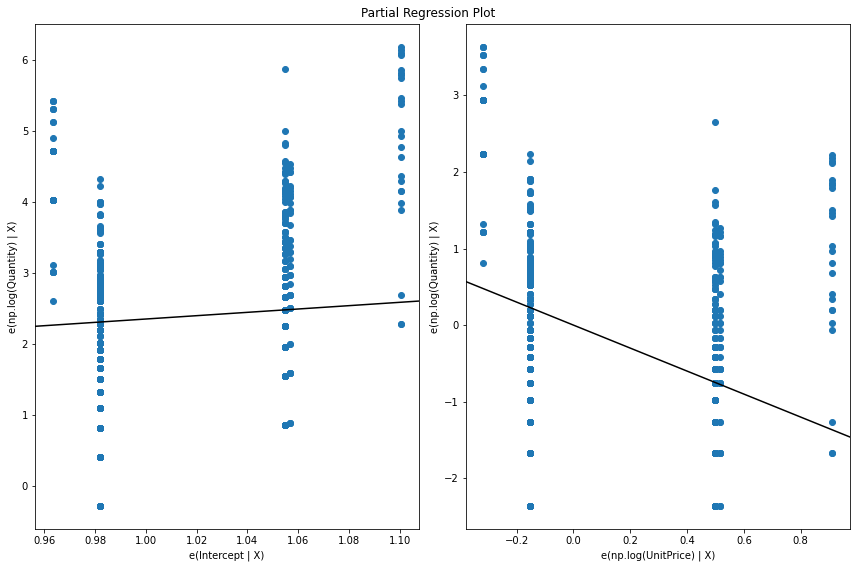

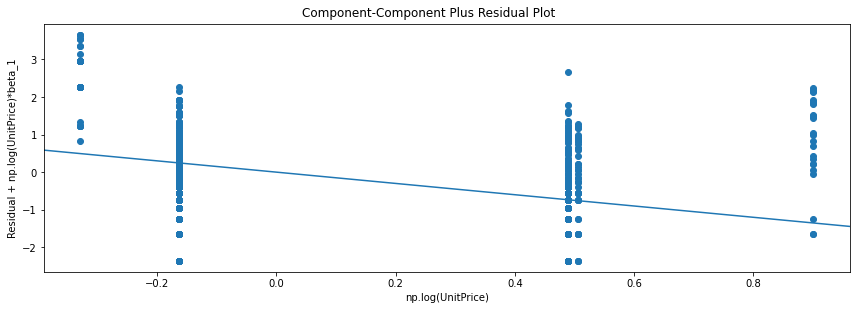

In [47]:
ols_summary_log(data[data['StockCode'] == chosen[4]], newDict, 'SMALL POPCORN HOLDER')

##### Summary Table
The small p values indicate that we can reject the null hypothesis that price has no effect on quantity. Therefore, price does have an effect on quantity for this particular item.

The coefficient of price is -1.4998. This refers to the inverse relationship between price and quantity. When price increases, quantity demanded decreases & vice versa


However, our current model can only explain a proportion of the variance. This can be seen from its R score of 0.135

##### Partial Regression Plot
As seen in the regression plot on the right, price & quantity have exhibits a negative relationship. When the price increases, the quantity of products sold will decrease.

##### Component-Component Plus Residual Plot
To properly evaluate the effects of price on quantity, we have to take into account the influence of other independent variables. As shown, the relationship between the variation in quantity explained by price is linear. There are not many factors that are exerting considerable influence on the linear relationship.

## Regression plots

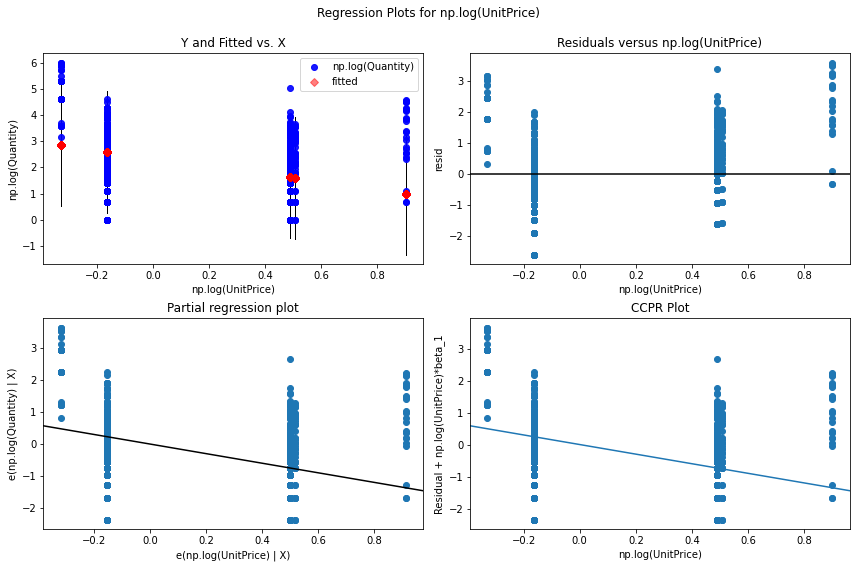

In [48]:
reg_plot(data[data['StockCode'] == chosen[4]])

##### Regression Plots
In graph Y and fitted vs X & Residuals vs Price, we can see that the variation between the predicted & the actual values are moderately high. The model is currently able to only able to explain a proportion of the variance.

## Recursive Least Square (RLS)

C:\Users\ernes\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\ernes\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:               Quantity   No. Observations:                 1406
Model:                    RecursiveLS   Log Likelihood               -2232.506
Date:                Thu, 22 Apr 2021   R-squared:                       0.135
Time:                        17:26:59   AIC                           4469.013
Sample:                             0   BIC                           4479.510
                               - 1406   HQIC                          4472.936
Covariance Type:            nonrobust   Scale                            1.392
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3492      0.031     74.604      0.000       2.287       2.411
UnitPrice     -1.4998      0.101    -14.830      0.000      -1.698      -1.302
Ljung-Box (Q):                       76.58   Jarque-

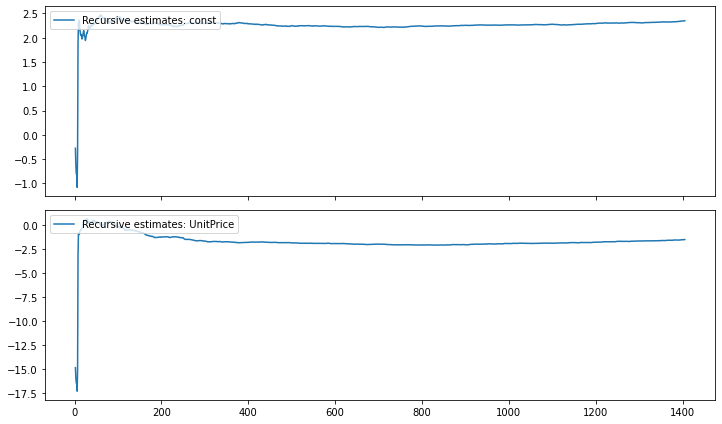

In [49]:
rls_summary_log(data[data['StockCode'] == chosen[4]])

##### Summary Table
The R-squared value, coefficient of price together and the p value remained consistent with the Ordinary Least Squares (OLS) calculation.

In [50]:
ped_df[ped_df['Item'] == 'SMALL POPCORN HOLDER']

,Item,Price Elasticity of Demand
4,SMALL POPCORN HOLDER,-0.06447


### Conclusion for the Small Popcorn Holder
Both Ordinary Least Squares (OLS) & Recursive Least Squares (RLS) are consistent with the fact that price exhibits a OPPOSITE influence on quantity.

Since the price elasticity of demand is < 1, we can conclude that the item is inelastic where changes in price have a less than proportional effect on the quantity of the good demanded. 

## Conclusion for all household items

Household items sold on ecommerce platforms tend to be inelastic where changes in price have a less than proportional effect on the quantity of the good demanded. This can be seen from the aforementioned 5 household items where we concluded that price had a minimal change in quantity of products sold. This means that consumers are not sensitive towards the changes in price (they buy about the same quantity even when prices change). Furthermore, the relationship between price and quantity of household products is negative

<BarContainer object of 5 artists>

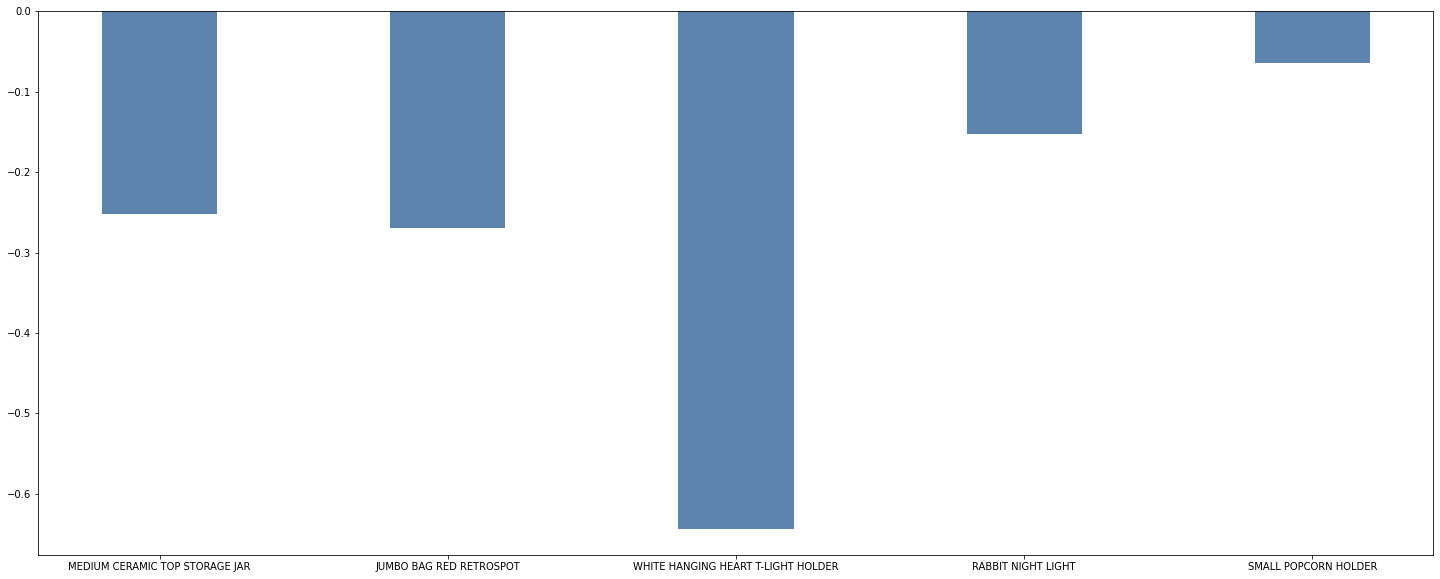

In [51]:
plt.figure(figsize=(25, 10))
plt.bar(ped_df['Item'], ped_df['Price Elasticity of Demand'], color=(0.2, 0.4, 0.6, 0.8),  width = 0.4) 

While the R squared value is low, the low p values still indicate a real relationship between price & quantity of products sold. 

The only caveat here is models with lower R square have a larger prediction interval. This would result in predictions that may not be as precise for a given regression equation.

However, since we are not using the model to predict price or quantity for a given product. The R squared value is not taken with as much importance as we can already ascertain that the products' elasticity through the changes in quantity & price.

In [52]:
ped_df

,Item,Price Elasticity of Demand
0,MEDIUM CERAMIC TOP STORAGE JAR,-0.252276
1,JUMBO BAG RED RETROSPOT,-0.270049
2,WHITE HANGING HEART T-LIGHT HOLDER,-0.643593
3,RABBIT NIGHT LIGHT,-0.152063
4,SMALL POPCORN HOLDER,-0.064470


<BarContainer object of 5 artists>

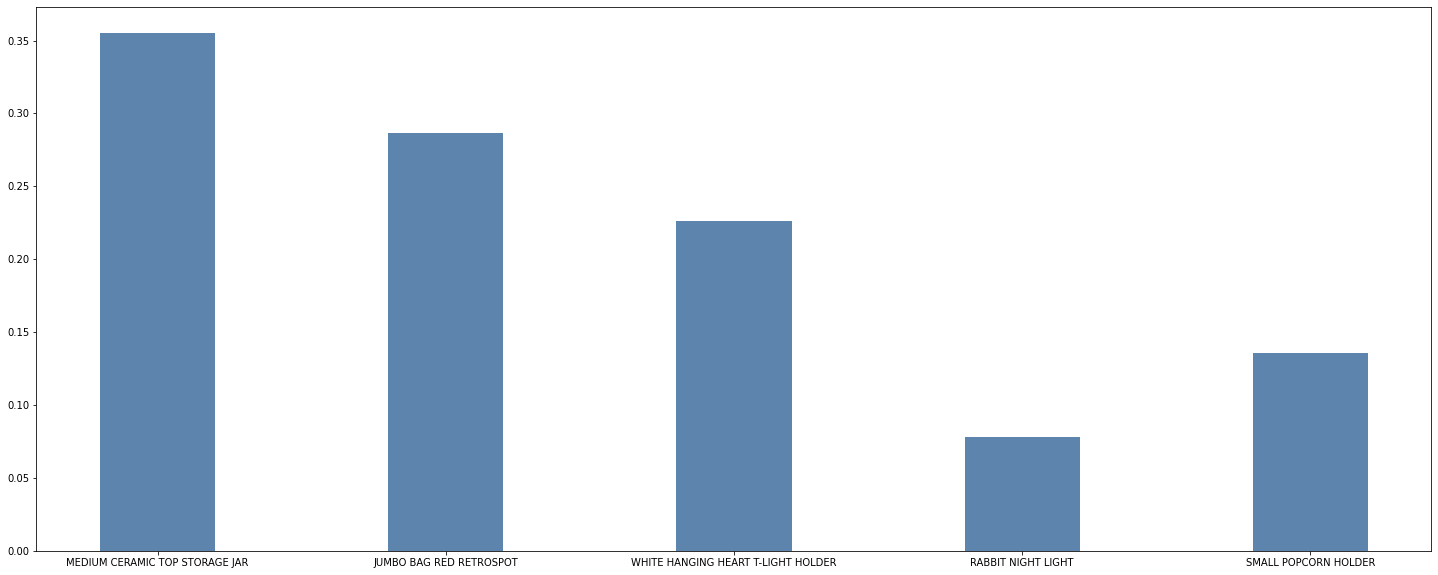

In [53]:
r2_df = pd.DataFrame(newDict)
plt.figure(figsize=(25, 10))
plt.bar(ped_df['Item'], r2_df['R Squared Value'], color=(0.2, 0.4, 0.6, 0.8),  width = 0.4) 

In [54]:
r2_df

,Item,R Squared Value
0,MEDIUM CERAMIC TOP STORAGE JAR,0.355093
1,JUMBO BAG RED RETROSPOT,0.286386
2,WHITE HANGING HEART T-LIGHT HOLDER,0.225977
3,RABBIT NIGHT LIGHT,0.077781
4,SMALL POPCORN HOLDER,0.135434
